<h1><strong>Data Analysis and Machine Learning Hackathon</strong></h1>
<p><strong>Professor:</strong> Howard Roatti</p>
<p><strong>Alunos:</strong> Weverton Gomes, João Guilherme Pigatti, Natália Tayar, Wanderson Franco, Ronaldo Luiz</p>

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
# Carregar os dados
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')
sample_submission = pd.read_csv('./Data/sample_submission.csv')

# Exibir as primeiras linhas dos dados de treinamento
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Resumo estatístico das variáveis numéricas
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


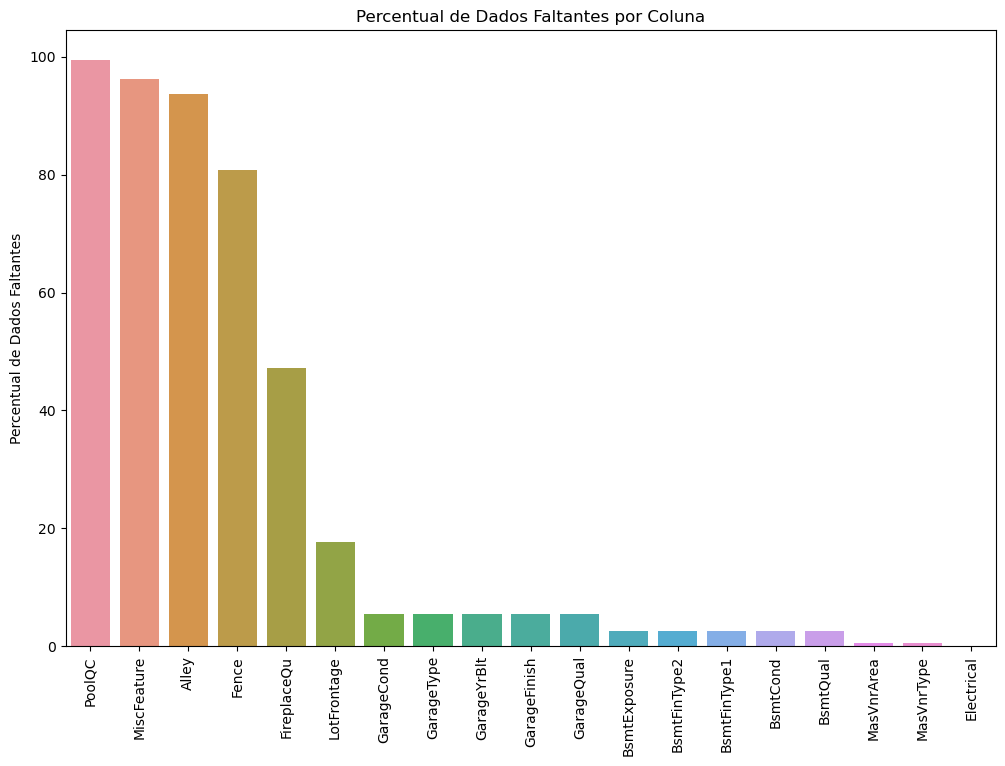

In [5]:
# Verificar dados faltantes
missing_data = train_data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(train_data)) * 100
print(missing_data_percentage)

# Visualizar dados faltantes
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage)
plt.xticks(rotation=90)
plt.title('Percentual de Dados Faltantes por Coluna')
plt.ylabel('Percentual de Dados Faltantes')
plt.show()

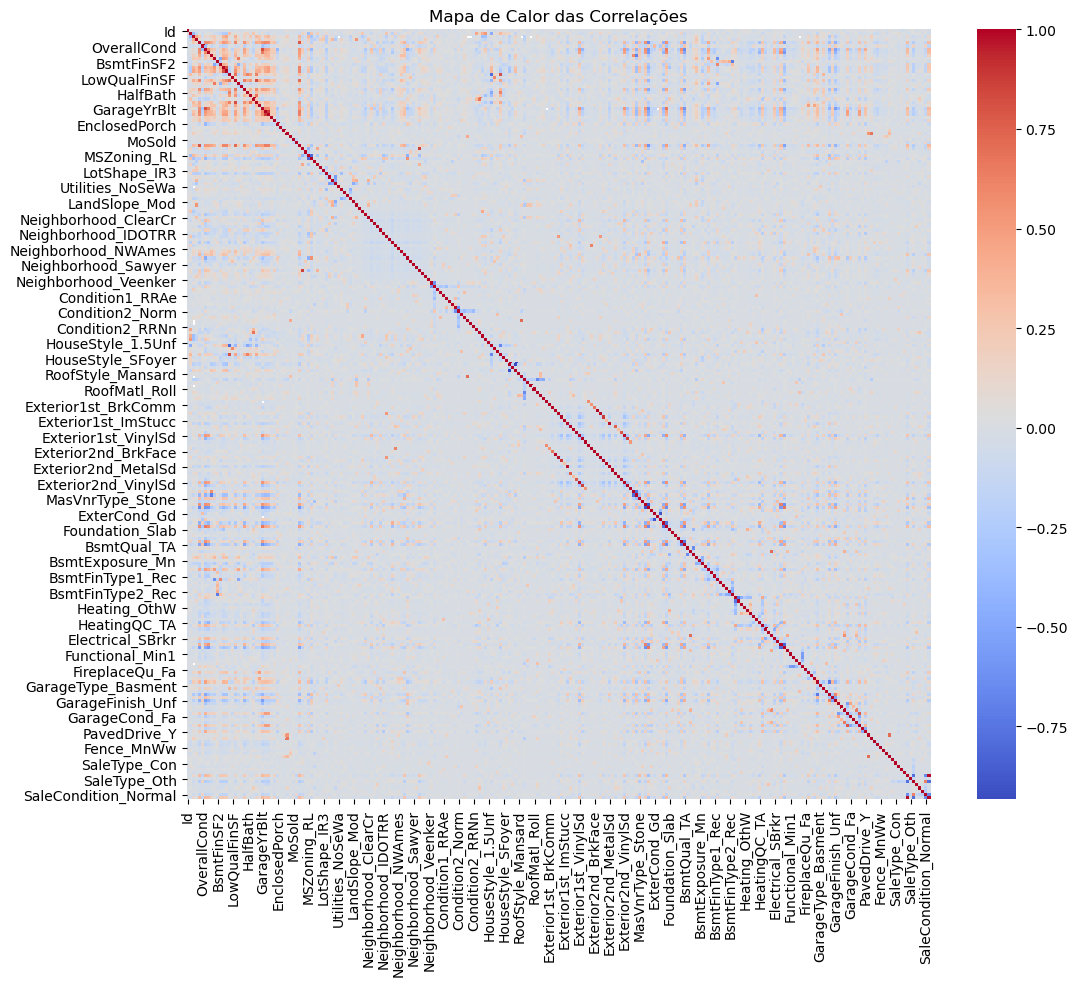

In [6]:
# Identificar variáveis categóricas
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Aplicar codificação one-hot
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# Mapa de calor das correlações
corr_matrix = train_data_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
ExterQual_TA    0.589044
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


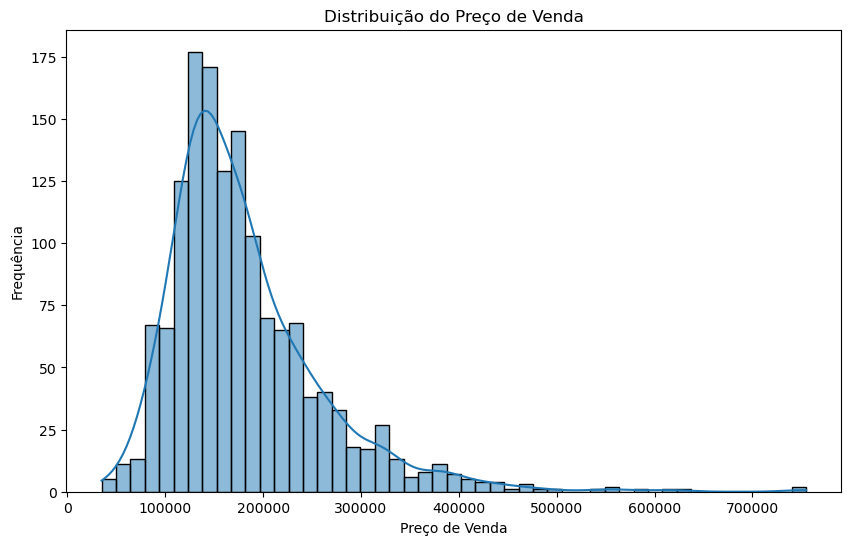

In [7]:
# Correlações fortes com SalePrice
strong_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
print(strong_corr.head(10))

# Histograma do preço de venda
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

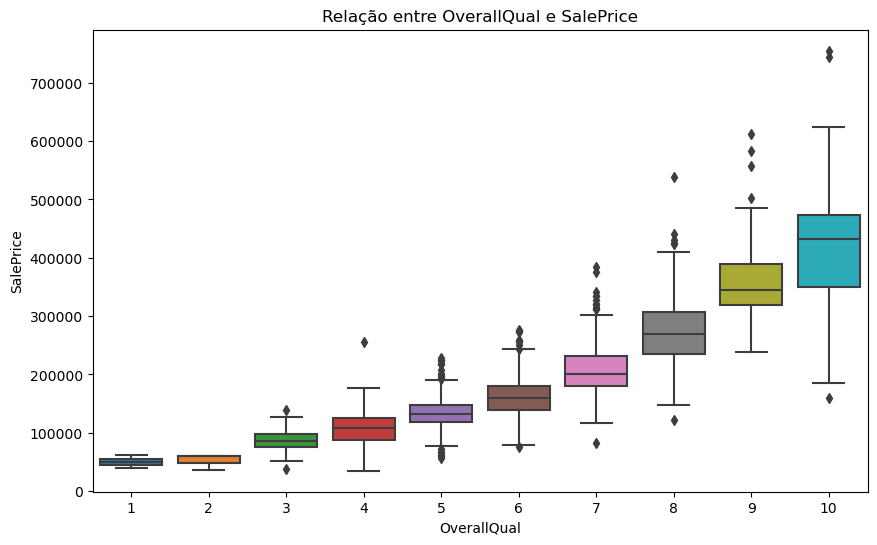

In [8]:
# Relação entre OverallQual e SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Relação entre OverallQual e SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

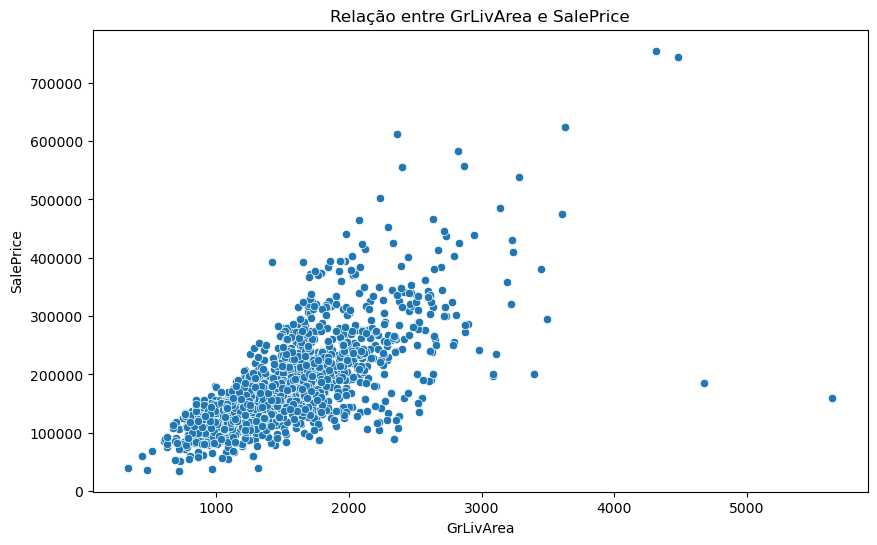

In [9]:

# Relação entre GrLivArea e SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('Relação entre GrLivArea e SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

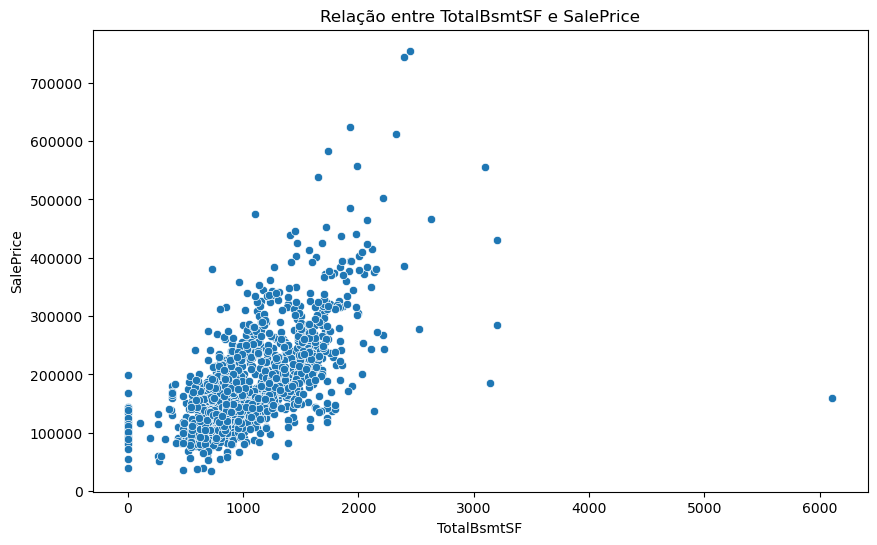

In [10]:
# Relação entre TotalBsmtSF e SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_data)
plt.title('Relação entre TotalBsmtSF e SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

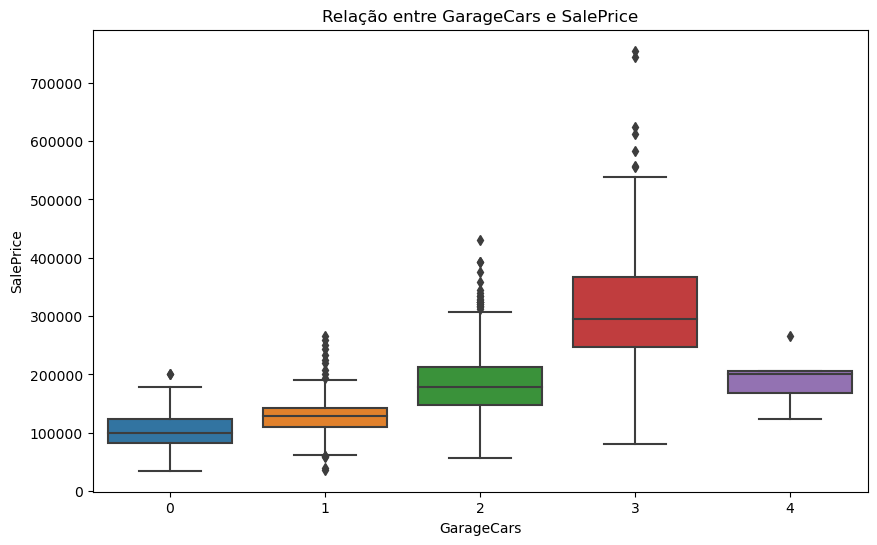

In [11]:
# Relação entre GarageCars e SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data)
plt.title('Relação entre GarageCars e SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

<h1> Featuring Engineering</h1>

In [12]:
# Verificar dados faltantes
missing_data = train_data.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [13]:
# Preencher valores numéricos faltantes com a mediana
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())

# Preencher valores categóricos faltantes com o valor mais frequente (moda)
categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verificar se ainda há valores faltantes
print(train_data.isnull().sum().sort_values(ascending=False).head())

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64


In [14]:
# Codificar variáveis categóricas usando one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

print(train_data_encoded.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...               0               0   
1          1976         0.0         978  ...               0               0   
2          2002       162.0         486  ...               0               0   
3          1970         0.0         216  ...               0               0   
4          2000       350.0         655  ...               0               0   

   SaleType_New  SaleType_Oth  SaleTyp

In [15]:
# Separar as variáveis independentes (X) e dependente (y)
X = train_data_encoded.drop(['SalePrice', 'Id'], axis=1)
y = train_data_encoded['SalePrice']

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Regressão Lasso com validação cruzada
lasso = LassoCV(cv=10)
lasso.fit(X_scaled, y)

# Coeficientes das variáveis
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Selecionar variáveis importantes (coeficientes diferentes de zero)
important_features = lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False)
print("Variáveis importantes selecionadas pela Regressão Lasso:")
print(important_features)

# Selecionar apenas as variáveis importantes
X_important = X[important_features.index]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Variáveis importantes selecionadas pela Regressão Lasso:
GrLivArea               23893.390098
OverallQual             17430.524348
Neighborhood_NridgHt     8843.981156
GarageCars               7156.808956
Neighborhood_NoRidge     6470.575220
                            ...     
KitchenQual_TA          -4045.745106
BsmtQual_Gd             -4066.581015
KitchenQual_Gd          -4119.951583
Condition2_PosN         -4677.051240
MSSubClass              -6898.887356
Length: 68, dtype: float64
Mean Squared Error: 859516900.2018118


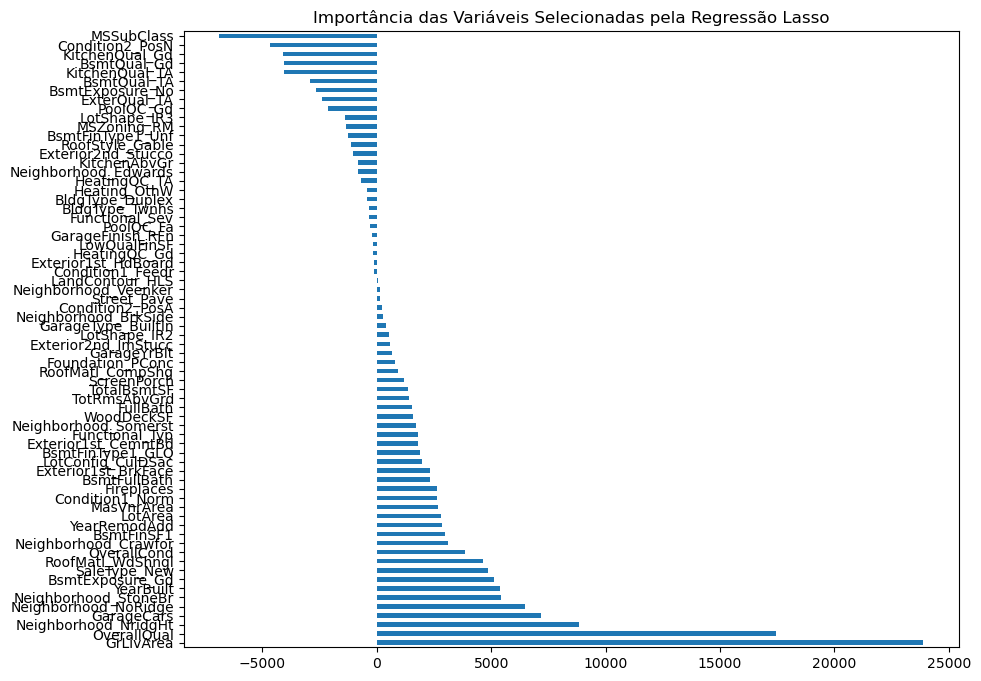

In [16]:
# Plotar as variáveis importantes
plt.figure(figsize=(10, 8))
important_features.plot(kind='barh')
plt.title('Importância das Variáveis Selecionadas pela Regressão Lasso')
plt.show()

# *APRENDIZAGEM SUPERVISIONADA*

In [20]:
# Criando o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred = linear_model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparacao = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(comparacao.head())

Mean Squared Error: 859516900.2018118
        Real       Previsto
892   154500  152489.002902
1105  325000  332353.085490
413   115000   86833.419890
522   159000  178847.470070
1036  315500  330047.410355


In [25]:
# Convertendo o preço de venda em uma variável binário com base na mediana
#Se o valor é maior que 1  = preço alto , menor que 1 = preço baixo
median_price = train_data['SalePrice'].median()
y_binary = (train_data['SalePrice'] > median_price).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Utilizando Random Forest
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliando o modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[152   9]
 [  6 125]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       161
           1       0.93      0.95      0.94       131

    accuracy                           0.95       292
   macro avg       0.95      0.95      0.95       292
weighted avg       0.95      0.95      0.95       292



# APRENDIZAGEM NÃO SUPERVISIONADA

C:\Users\rr_so\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rr_so\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


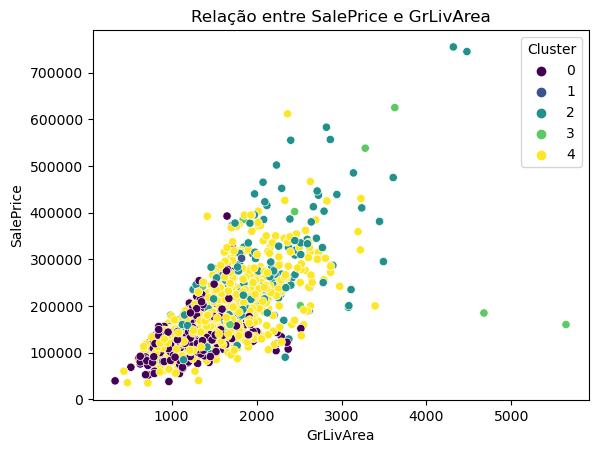

In [100]:

# Aplicando K-Means para identificar grupos de casas
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionando a coluna de clusters ao dataframe
train_data['Cluster'] = clusters

# Visualizando os clusters
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], hue=train_data['Cluster'], palette='viridis')
plt.title('Relação entre SalePrice e GrLivArea')
plt.show()

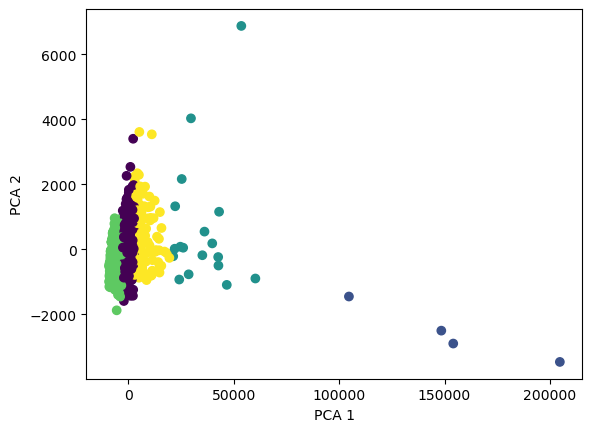

In [57]:
#Técnica PCA para visualizar os dados em um espaço de menor dimensão.

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Visualizando os dados em 2D
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Regras de associação:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(r),(e),0.030137,0.036986,0.026027,0.863636,23.350168,0.024913,7.062100,0.986916
5,(e),(r),0.036986,0.030137,0.026027,0.703704,23.350168,0.024913,3.273288,0.993936
1,(a),(e),0.030822,0.036986,0.021918,0.711111,19.226337,0.020778,3.333509,0.978136
7,"(a, r)",(e),0.017808,0.036986,0.017123,0.961538,25.997151,0.016465,25.038356,0.978968
8,"(a, e)",(r),0.021918,0.030137,0.017123,0.781250,25.923295,0.016463,4.433659,0.982969
3,(d),(o),0.015753,0.025342,0.013014,0.826087,32.596945,0.012614,5.604281,0.984837
17,"(n, i)",(t),0.013014,0.030822,0.010959,0.842105,27.321637,0.010558,6.138128,0.976102
16,"(t, i)",(n),0.015068,0.023973,0.010959,0.727273,30.337662,0.010598,3.578767,0.981832
15,"(t, n)",(i),0.014384,0.021918,0.010959,0.761905,34.761905,0.010644,4.107945,0.985407
14,"(t, r)",(e),0.013014,0.036986,0.010959,0.842105,22.768031,0.010478,6.099087,0.968685


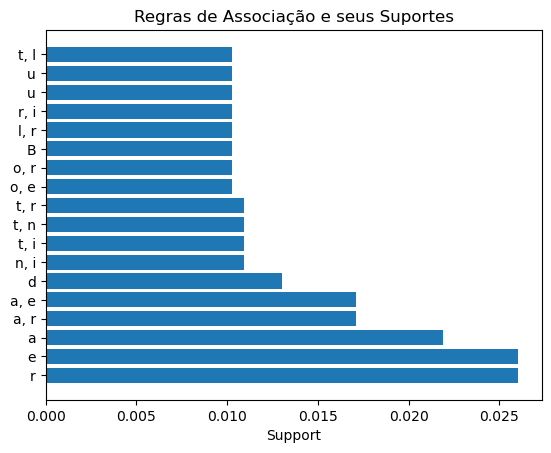

In [92]:
#Aplicando Apriori
te = TransactionEncoder()
te_ary = te.fit(train_data).transform(train_data)
train_data_binary = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(train_data_binary, min_support=0.01, use_colnames=True)

# Verificar se há itemsets frequentes antes de aplicar association_rules
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
    # Ordenando as regras de associação pelo suporte
    rules = rules.sort_values(by='support', ascending=False)
    print("Regras de associação:")
    display(rules)
    # Gerando o gráfico de barras
    plt.barh(range(len(rules)), rules['support'], align='center')
    plt.yticks(range(len(rules)), [', '.join(items) for items in rules['antecedents']])
    plt.xlabel('Support')
    plt.title('Regras de Associação e seus Suportes')
    plt.show()

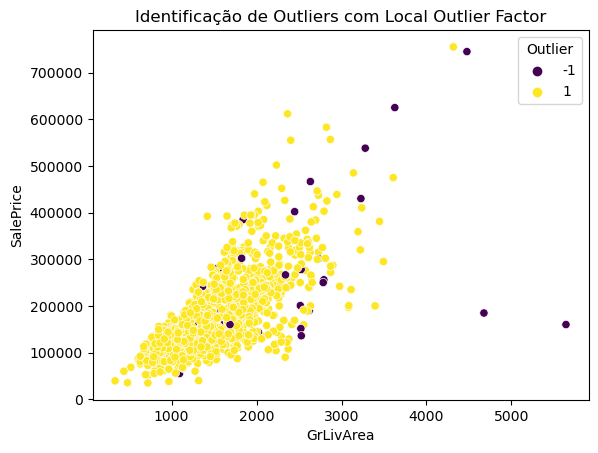

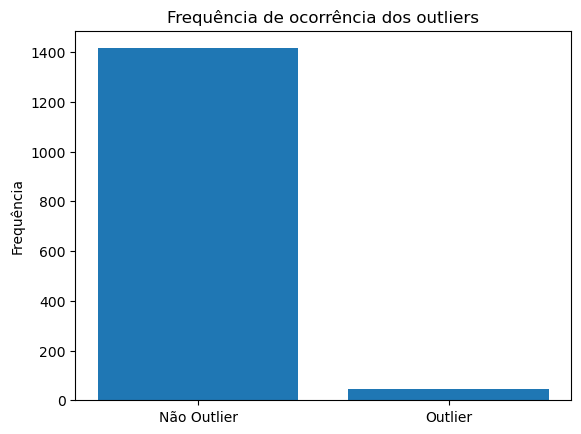

In [86]:
# Aplicando Local Outlier Factor
lof = LocalOutlierFactor()
X = train_data.drop('SalePrice', axis=1)
X = pd.get_dummies(X)
outliers = lof.fit_predict(X)

# Adicionando a coluna de outliers ao dataframe
train_data['Outlier'] = outliers
outliers_freq = train_data['Outlier'].value_counts()
# Visualizando os outliers
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], hue=train_data['Outlier'], palette='viridis')
plt.title('Identificação de Outliers com Local Outlier Factor')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()
#Gerando o gráfico de barras da frequencia dos outliers
fig, ax = plt.subplots()
ax.bar(np.arange(2), outliers_freq)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Não Outlier', 'Outlier'])
ax.set_ylabel('Frequência')
ax.set_title('Frequência de ocorrência dos outliers')
plt.show()

# *VISUALIZAÇÃO DE DADOS*

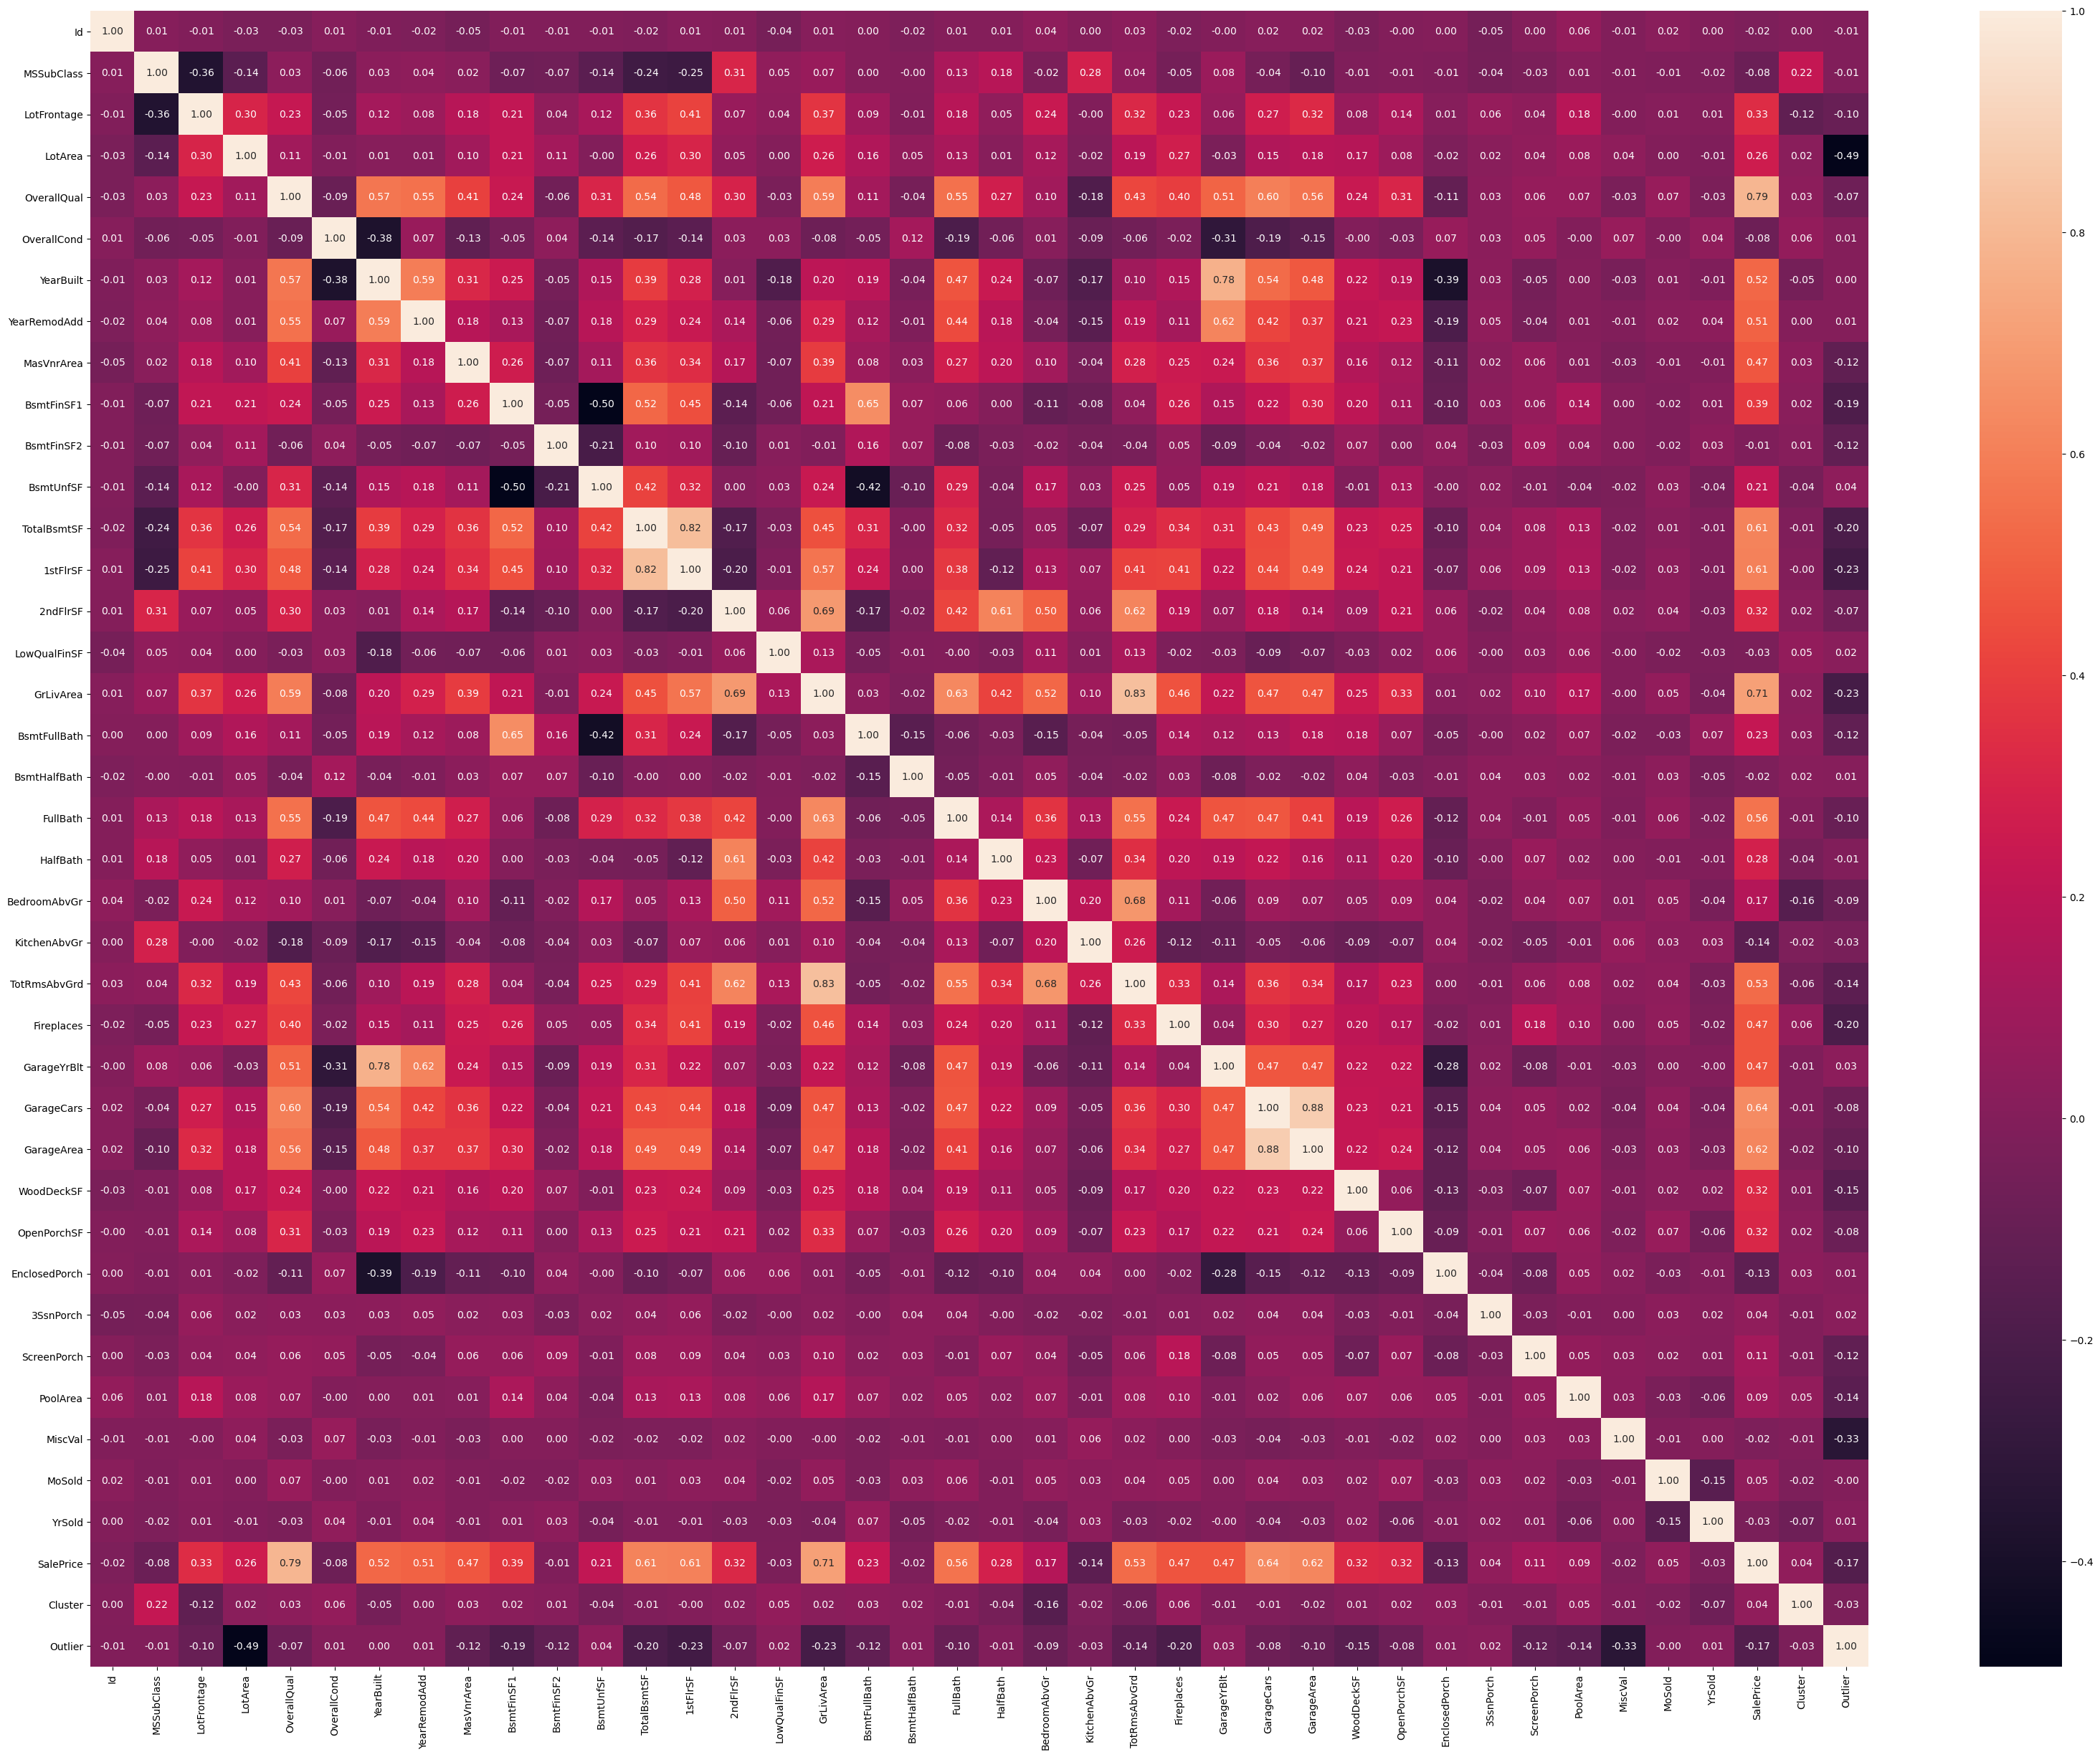

In [65]:
# Visualização de Correlação após tratamentos
plt.figure(figsize=(40, 30))
# Selecionar apenas colunas numericas para correlação
numeric_train_data = train_data.select_dtypes(include='number')
correlation_matrix = numeric_train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

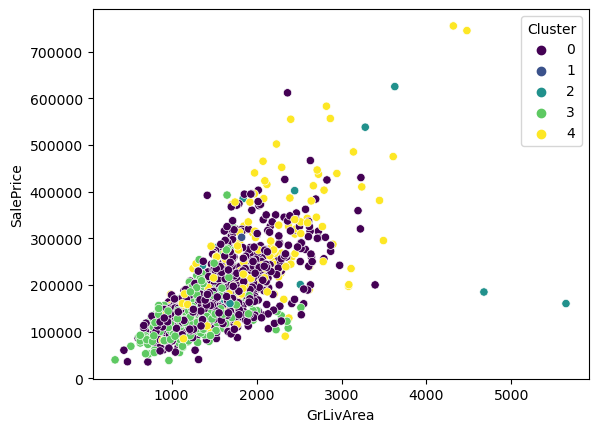

In [64]:
# Visualização de Clusterização após tratamentos
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], hue=train_data['Cluster'], palette='viridis')
plt.show()

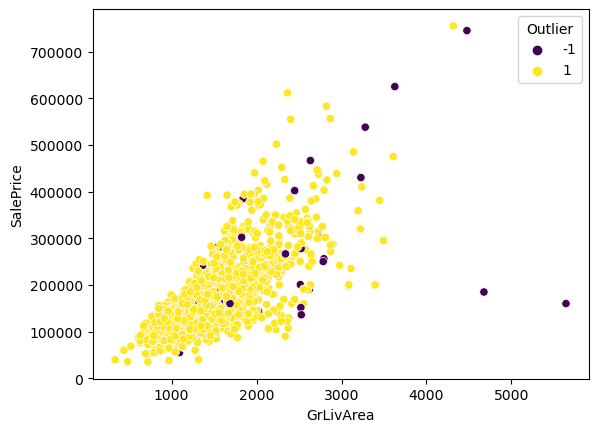

In [63]:
# Visualização de Outliers após tratamentos
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], hue=train_data['Outlier'], palette='viridis')
plt.show()